In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import scipy
from scipy.stats import skewnorm

In [6]:
np.random.seed(seed=1)
size=200

X1 = np.random.normal(loc=40, scale=2, size=int(size/2) )
X2 = np.random.normal(loc=10, scale=4, size=int(size/2) ) 
bi_modal = np.concatenate([X1, X2])

X1 = np.random.normal(loc=40, scale=4, size=int(size/4) )
X2 = np.random.normal(loc=10, scale=4, size=int(size/4) ) 
X3 = np.random.normal(loc=0, scale=2, size=int(size/4) ) 
X4 = np.random.normal(loc=80, scale=2, size=int(size/4) ) 
multi_modal = np.concatenate([X1, X2, X3, X4])


df = pd.DataFrame(data={'Normal':np.random.normal(loc=0, scale=2, size=size),
                        "Positive Skewed": skewnorm.rvs(a=10, size=size),
                        "Negative Skewed": skewnorm.rvs(a=-10, size=size),
                        "Exponential":np.random.exponential(scale=20,size=size),
                        "Uniform":np.random.uniform(low=0.0, high=1.0, size=size),
                        "Bimodal":  bi_modal,
                        "Multimodal":  multi_modal,
                        "Poisson":np.random.poisson(lam=1.0, size=size),
                        "Discrete": np.random.choice([10,12,14,15,16,17,20],size=size),
                        }).round(3)

df.head(3)

,Normal,Positive Skewed,Negative Skewed,Exponential,Uniform,Bimodal,Multimodal,Poisson,Discrete
0,-2.613,0.987,-0.099,36.250,0.864,43.249,38.396,0,20
1,0.153,0.570,-2.485,16.062,0.448,38.776,43.296,1,17
2,0.734,1.093,-0.487,40.443,0.562,38.944,37.751,1,17


We loop on each variable and create a figure with two plots, one boxplot and one histogram

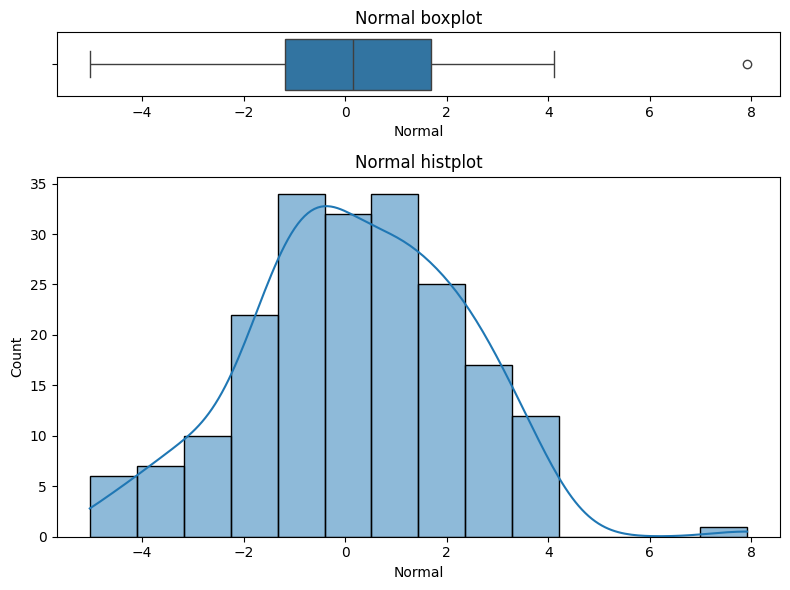

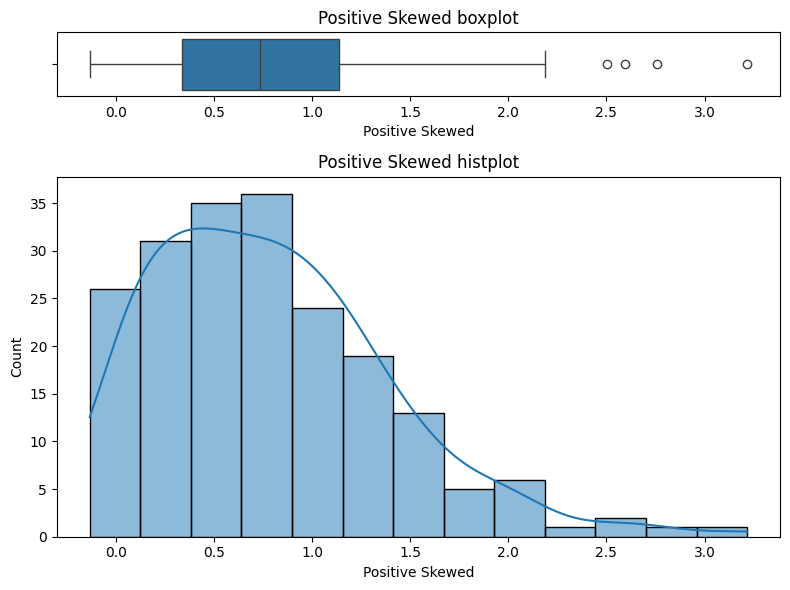

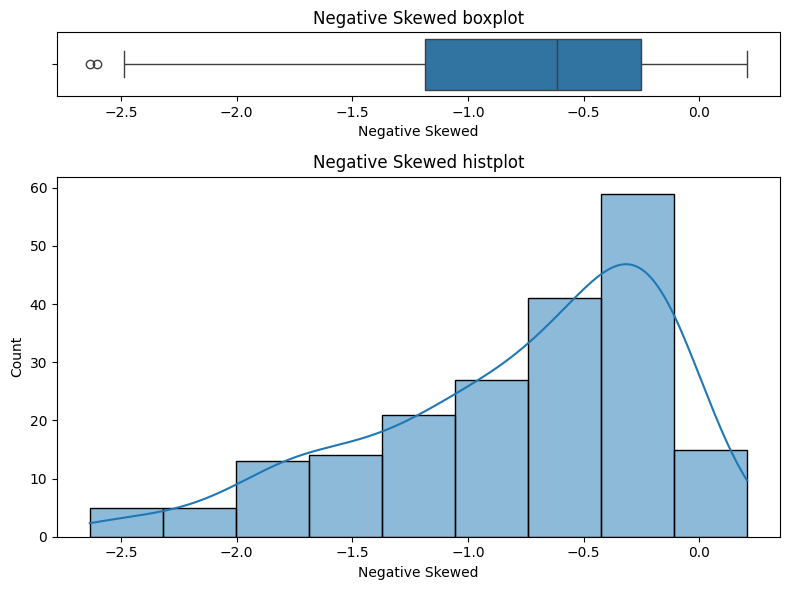

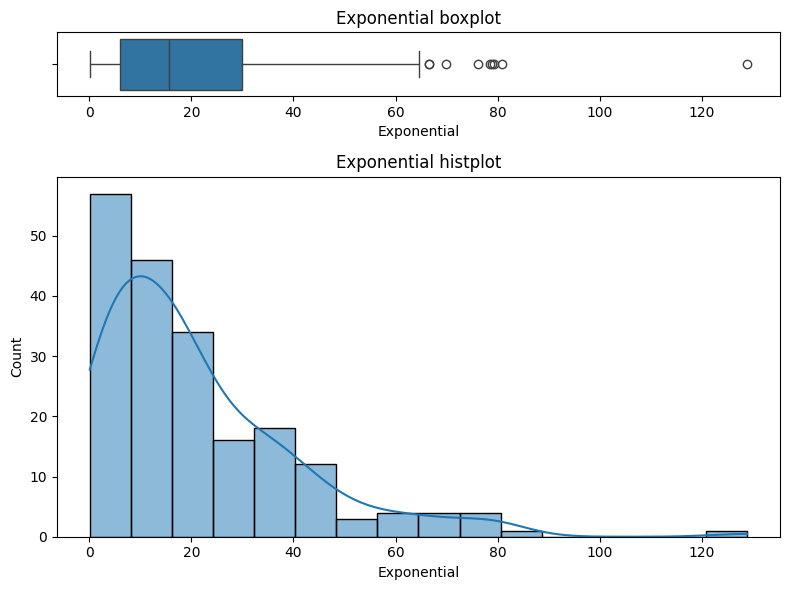

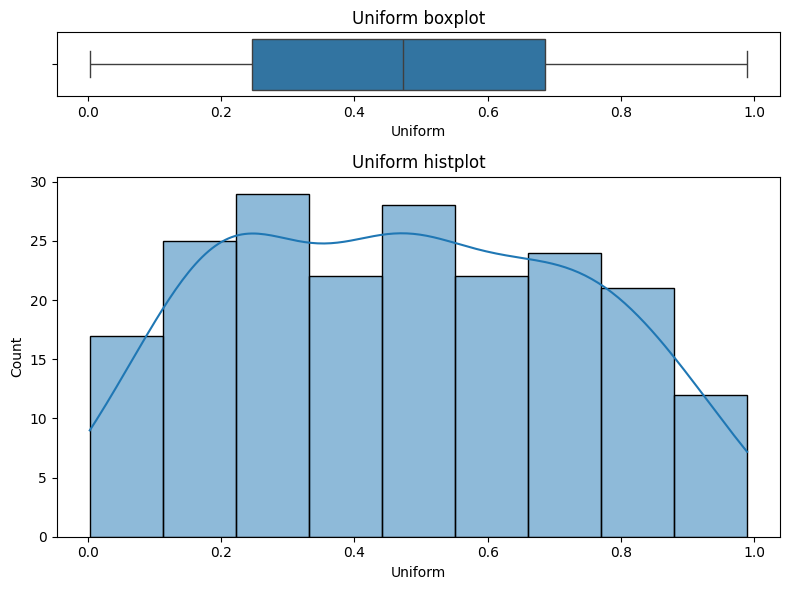

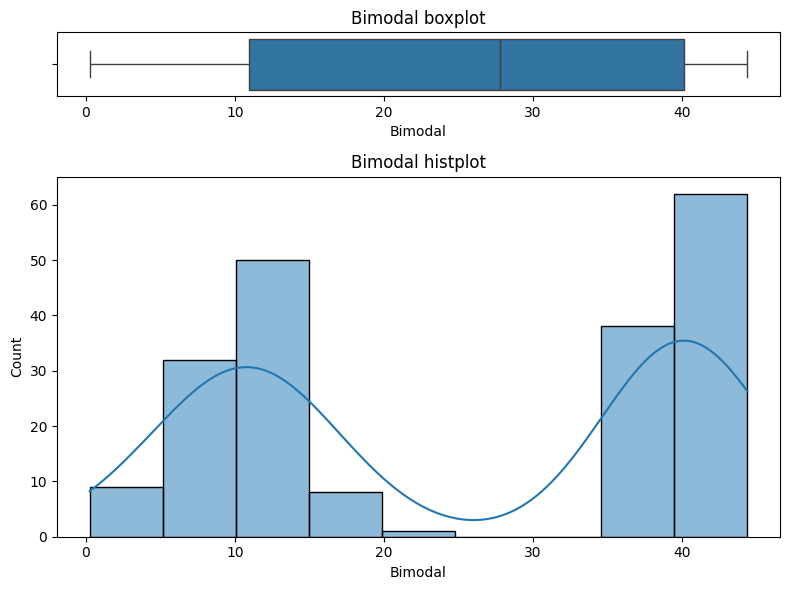

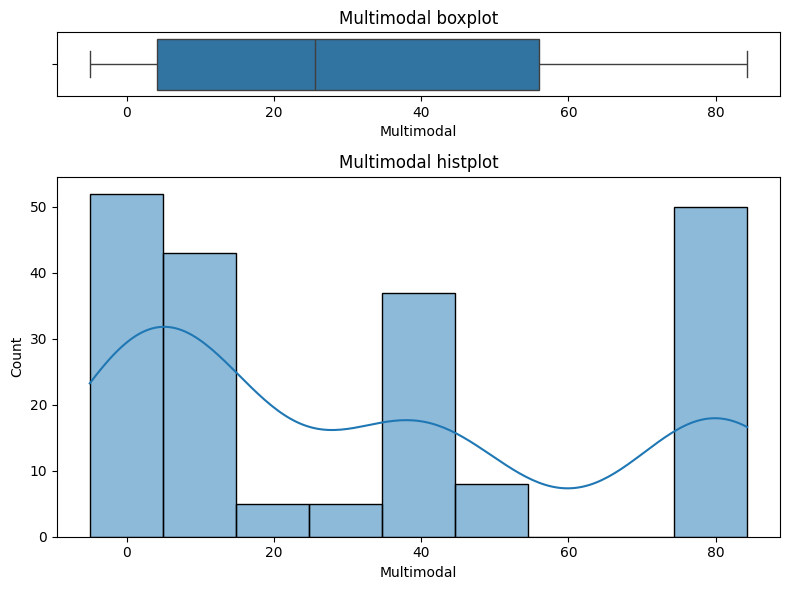

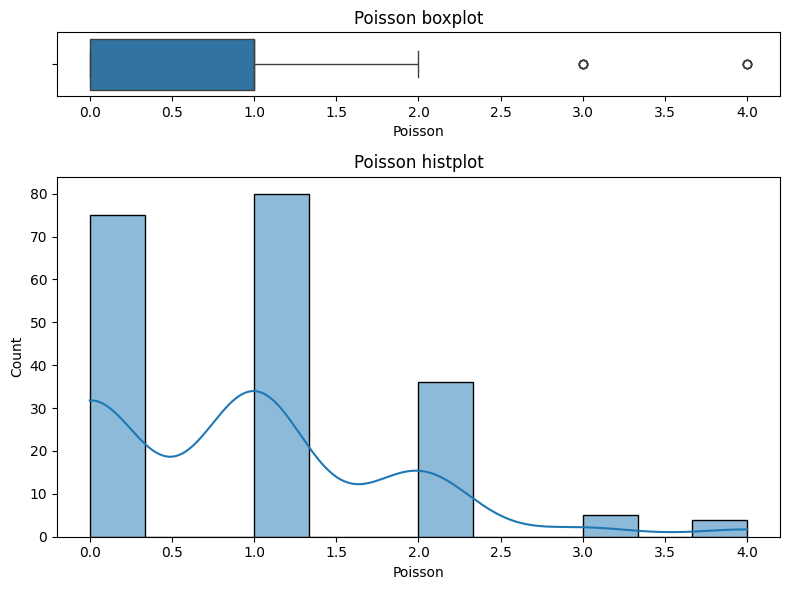

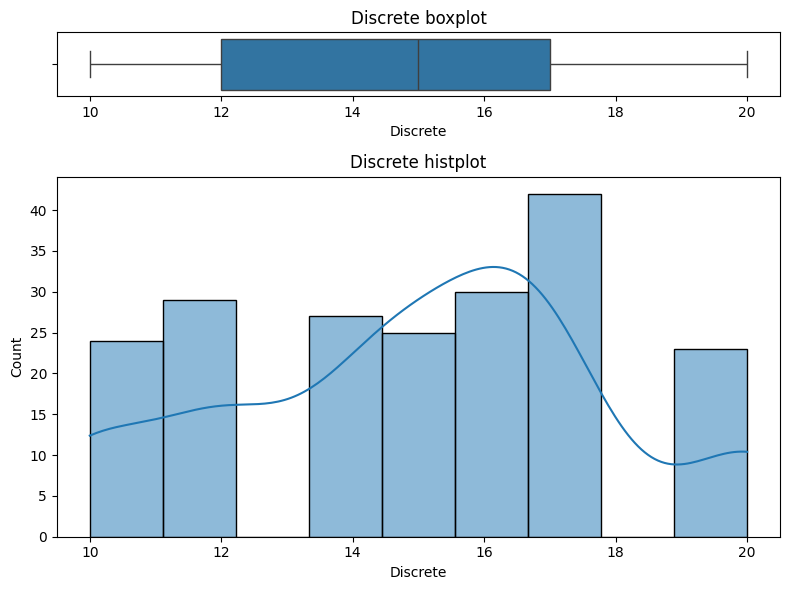

In [20]:
for col in df.columns:
    fig, axes= plt.subplots(nrows=2 , ncols=1, figsize=(8,6), gridspec_kw={"height_ratios":(.15, .85)})
    sns.boxplot(data=df, x=col, ax=axes[0])
    axes[0].set_title(f"{col} boxplot")
    print("\n\n")
    sns.histplot(data=df, x=col, kde=True, ax=axes[1])
    axes[1].set_title(f"{col} histplot")
    plt.tight_layout()
    print("\n\n")
    plt.show()

In [26]:
pg.normality(data=df, alpha=0.05)

,W,pval,normal
Normal,0.988677,1.138580e-01,True
Positive Skewed,0.942788,4.038894e-07,False
Negative Skewed,0.918364,4.423817e-09,False
Exponential,0.838932,1.286833e-13,False
Uniform,0.968244,1.724490e-04,False
Bimodal,0.790214,1.158851e-15,False
Multimodal,0.843655,2.137806e-13,False
Poisson,0.817142,1.403161e-14,False
Discrete,0.931506,4.456337e-08,False


In [27]:
df1 = sns.load_dataset("penguins")
df1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [31]:
pg.normality(data=df1.select_dtypes(include="number"), alpha=0.05)

,W,pval,normal
bill_length_mm,0.974855,1.119730e-05,False
bill_depth_mm,0.972584,4.418821e-06,False
flipper_length_mm,0.951545,3.540136e-09,False
body_mass_g,0.959211,3.679039e-08,False


In [36]:
pg.normality(data=df1, dv="bill_length_mm", group="species", alpha=0.05).reset_index()

,species,W,pval,normal
0,Adelie,0.993362,0.716601,True
1,Chinstrap,0.975250,0.194093,True
2,Gentoo,0.972722,0.013491,False


You can plot a histogram for bill_length_mm, and bill_length_mm per species to make sense of the distribution plot/shape and the shapiro results

bill_length_mm variable is not normally distributed
when you analyse bill_length_mm per species, Gentoo's bill_length_mm is not normally distributed

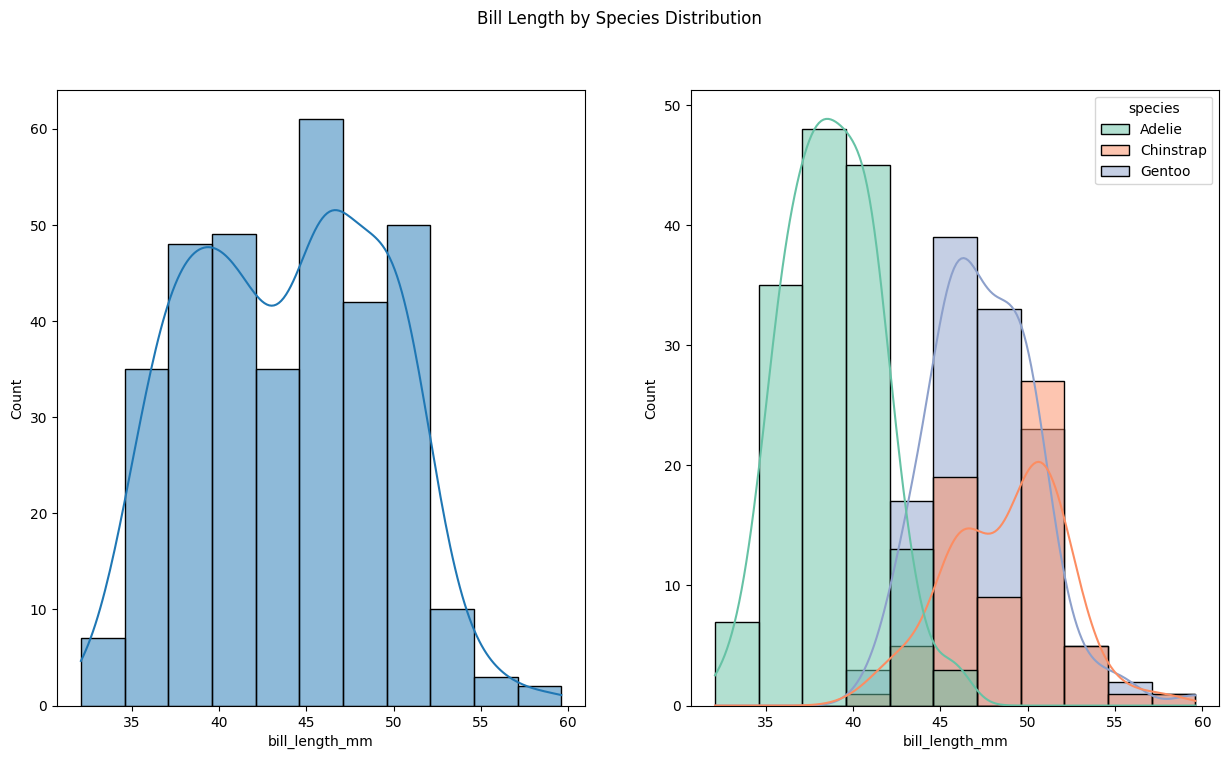

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.histplot(data=df1, x="bill_length_mm", kde=True, ax=axes[0])
sns.histplot(data=df1, hue="species", x="bill_length_mm", kde=True, palette="Set2",
ax=axes[1])
plt.suptitle("Bill Length by Species Distribution")
plt.show()